## People Analitics Advance Notebook

Langsung aja gas `pak eko` ~

# Import Library

In [1]:
# Basic
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Encoder
from sklearn.preprocessing import OrdinalEncoder

# Data Splitting & CV
from sklearn.model_selection import *

# Metrics
from sklearn.metrics import *

# Imbalance Learning
from imblearn.under_sampling import *
from imblearn.over_sampling import *

# Hyperparameter optimization
import optuna

# XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

# Set Configuration

Config disini buat pengaturan yang bakal ke apply secara global yakk ~~

In [2]:
# CONFIG
SEED = 2021

# Load Data

In [3]:
train = pd.read_csv("../input/bri-data-hackathon-pa/train.csv")
test = pd.read_csv("../input/bri-data-hackathon-pa/test.csv")

# Data Preprocessing

Preprocess datanya dlu mank~~

## To Do:

1. Feature Selection

## Handling Missing Value

Di sini handlenya masih sama kyk starter notebook yaitu langsung **Dibuang**

In [4]:
train = train.dropna()

## Handling Outlier

> dari Dimas bersabda bahwa ada nilai yang cuman ada sebiji di variable `job_level` di data test dan `person_level` di data train

In [5]:
test.loc[test['job_level'] == 'JG06', 'job_level'] = 'JG05'
train.loc[train['person_level'] == 'PG08', 'person_level'] = 'PG07'

## Feature Encode

Encoding ~

In [6]:
ord_features = ['job_level', 'person_level', 'Education_level']
ord_categories = [
    ["JG03", "JG04", "JG05"],
    ['PG01', 'PG02', 'PG03', 'PG04', 'PG05', 'PG06', 'PG07'],
    ["level_0", "level_1", "level_2", "level_3", "level_4", "level_5"]
]

In [7]:
ord_enc = OrdinalEncoder(categories = ord_categories)
train[ord_features] = ord_enc.fit_transform(train[ord_features])
test[ord_features] = ord_enc.transform(test[ord_features])

In [8]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [9]:
X = train.drop(['Best Performance'], axis = 1)
Y = train['Best Performance'].values

# Modelling

![Model](https://cdn-image.hipwee.com/wp-content/uploads/2019/11/hipwee-16-7.jpg)

> FMIPA modelnya yang islami aja yak~~

## Pakai Split biasa

Ini kebawah pakai split biasa ya sama kayak starter~~

In [10]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, 
                                                      random_state = SEED, stratify = Y)

In [11]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.05, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_int('gamma', 0, 5),
        'tree_method': 'gpu_hist',# Kalau di run di laptop sendiri dihapus aja
        'objective': 'binary:logistic',
        'eval_metric': 'logloss', # Metricnya pakai log loss kalau mau pake auc 
                                  # tinggal ganti jadi `auc`
        'random_state': SEED,
        'use_label_encoder':False
    }

    bst = XGBClassifier(**params)
    bst.fit(X_train,  Y_train, 
            eval_set=[(X_valid, Y_valid)], 
            early_stopping_rounds=10, verbose=False)

    preds = bst.predict_proba(X_valid)
    return log_loss(Y_valid, preds) # Kalau pke auc jadi roc_auc_score(y_valid, preds[:, 1])

study = optuna.create_study(direction='minimize') # Kalau pke auc jadi 'maximize'
study.optimize(objective, n_trials=50)

[I 2021-02-19 13:16:49,141] A new study created in memory with name: no-name-07c162a2-e1a5-4b7a-8a2f-622c696d6f1a
[I 2021-02-19 13:16:50,029] Trial 0 finished with value: 0.40732694390521673 and parameters: {'n_estimators': 396, 'max_depth': 5, 'learning_rate': 0.07521234691122732, 'subsample': 0.9376785745784508, 'colsample_bytree': 0.6650575646834266, 'gamma': 0}. Best is trial 0 with value: 0.40732694390521673.
[I 2021-02-19 13:16:50,236] Trial 1 finished with value: 0.40764411607300527 and parameters: {'n_estimators': 121, 'max_depth': 10, 'learning_rate': 0.060039445283022644, 'subsample': 0.7704255571739017, 'colsample_bytree': 0.7914813363907659, 'gamma': 5}. Best is trial 0 with value: 0.40732694390521673.
[I 2021-02-19 13:16:50,393] Trial 2 finished with value: 0.4087165050619336 and parameters: {'n_estimators': 265, 'max_depth': 14, 'learning_rate': 0.07737591521841525, 'subsample': 0.9982809020174533, 'colsample_bytree': 0.9299720415929404, 'gamma': 5}. Best is trial 0 with 

[I 2021-02-19 13:16:58,028] Trial 26 finished with value: 0.4066093773825294 and parameters: {'n_estimators': 265, 'max_depth': 8, 'learning_rate': 0.0819579208287743, 'subsample': 0.9718493641201915, 'colsample_bytree': 0.6306671452672402, 'gamma': 1}. Best is trial 6 with value: 0.4058257973181432.
[I 2021-02-19 13:16:58,428] Trial 27 finished with value: 0.4068927450405274 and parameters: {'n_estimators': 178, 'max_depth': 8, 'learning_rate': 0.08225566193664215, 'subsample': 0.963089519487934, 'colsample_bytree': 0.6145782807976051, 'gamma': 0}. Best is trial 6 with value: 0.4058257973181432.
[I 2021-02-19 13:16:58,906] Trial 28 finished with value: 0.40721986029365576 and parameters: {'n_estimators': 306, 'max_depth': 11, 'learning_rate': 0.07949445320971887, 'subsample': 0.935321042161895, 'colsample_bytree': 0.5512695698674444, 'gamma': 2}. Best is trial 6 with value: 0.4058257973181432.
[I 2021-02-19 13:16:59,261] Trial 29 finished with value: 0.40737784681286526 and parameters

print best score dan best parameter

In [12]:
print("Nilai terbaik dari model :", study.best_trial.value)
print("Dan parameternya :", study.best_params)

Nilai terbaik dari model : 0.4058257973181432
Dan parameternya : {'n_estimators': 212, 'max_depth': 8, 'learning_rate': 0.08054581603052813, 'subsample': 0.902404618683525, 'colsample_bytree': 0.6803537446454733, 'gamma': 1}


predict dari model

In [13]:
def predict(params, x_train, x_valid, y_train, y_valid):
    params['tree_method'] = 'gpu_hist' # Dihapus klo di run di laptop sendiri
    params['objective'] = 'binary:logistic'
    params['eval_metric'] = 'logloss' # tinggal ganti jadi `auc` klo pakai auc
    params['random_state'] = SEED
    params['use_label_encoder'] = False
    
    bst = XGBClassifier(**params)
    bst.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], 
            early_stopping_rounds=10, verbose=False)

    preds = bst.predict_proba(x_valid)[:,1]
    
    return bst, bst.predict_proba(test), roc_auc_score(y_valid, preds)

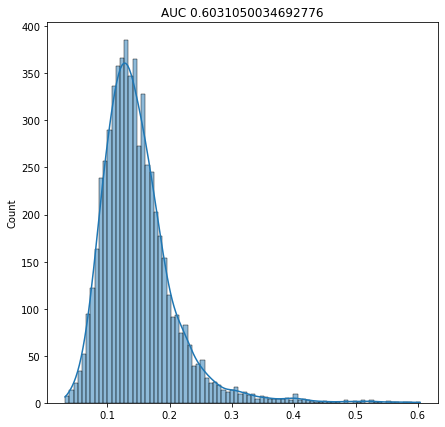

In [14]:
model, model_pred, auc = predict(study.best_params, X_train, X_valid, Y_train, Y_valid)

plt.figure(figsize = (7, 7))
sns.histplot(x = model_pred[:,1], kde = True)
plt.title(f"AUC {auc}")
plt.show()

In [15]:
sample = pd.read_csv("../input/bri-data-hackathon-pa/sample_submission.csv")
sample["Best Performance"] = model_pred[:, 1]
sample.to_csv("XGBoost - Optuna.csv", index = False)

## Dengan StratifiedKfold

![StratifiedKfold](https://i.stack.imgur.com/B9CCp.png)

`StratifiedKfold` dengan banyak split 5

In [16]:
cv = StratifiedKFold(n_splits = 5, shuffle = True,
                     random_state = SEED)

In [ ]:
trial = [] # tempat store hasil study
for i, (train_index, test_index) in enumerate(cv.split(X, Y)):
    
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 500),
            'max_depth': trial.suggest_int('max_depth', 5, 15),
            'learning_rate': trial.suggest_uniform('learning_rate', 0.05, 0.1),
            'subsample': trial.suggest_uniform('subsample', 0.5, 1),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
            'gamma': trial.suggest_int('gamma', 0, 5),
            'tree_method': 'gpu_hist',  
            'objective': 'binary:logistic',
            'eval_metric': 'logloss',
            'random_state': SEED,
            'use_label_encoder':False
        }

        bst = XGBClassifier(**params)
        bst.fit(X.values[train_index], Y[train_index], 
                eval_set=[(X.values[test_index], Y[test_index])], 
                early_stopping_rounds=10, verbose=False)
        
        preds = bst.predict_proba(X.values[test_index])
        return log_loss(Y[test_index], preds)
    
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50)
    trial.append(study)

[I 2021-02-19 13:17:08,017] A new study created in memory with name: no-name-d65b220d-bb88-4e05-8b34-29dfb69bc27a
[I 2021-02-19 13:17:08,268] Trial 0 finished with value: 0.40799568084217624 and parameters: {'n_estimators': 124, 'max_depth': 7, 'learning_rate': 0.05786089743749728, 'subsample': 0.8861578997406118, 'colsample_bytree': 0.7553948982929193, 'gamma': 3}. Best is trial 0 with value: 0.40799568084217624.
[I 2021-02-19 13:17:08,488] Trial 1 finished with value: 0.40959056288150864 and parameters: {'n_estimators': 460, 'max_depth': 7, 'learning_rate': 0.05396618808223443, 'subsample': 0.8391913339675646, 'colsample_bytree': 0.5435356620878937, 'gamma': 3}. Best is trial 0 with value: 0.40799568084217624.
[I 2021-02-19 13:17:08,953] Trial 2 finished with value: 0.4112569630139348 and parameters: {'n_estimators': 153, 'max_depth': 11, 'learning_rate': 0.0769546821722508, 'subsample': 0.7938588081232442, 'colsample_bytree': 0.5738329568389879, 'gamma': 1}. Best is trial 0 with val

[I 2021-02-19 13:17:15,445] Trial 26 finished with value: 0.41049911105167913 and parameters: {'n_estimators': 324, 'max_depth': 11, 'learning_rate': 0.07151092552903922, 'subsample': 0.87855004987039, 'colsample_bytree': 0.7103521097576716, 'gamma': 4}. Best is trial 0 with value: 0.40799568084217624.
[I 2021-02-19 13:17:15,826] Trial 27 finished with value: 0.41084142757979597 and parameters: {'n_estimators': 478, 'max_depth': 13, 'learning_rate': 0.08380496823688448, 'subsample': 0.9513843128363302, 'colsample_bytree': 0.7817848364626648, 'gamma': 2}. Best is trial 0 with value: 0.40799568084217624.
[I 2021-02-19 13:17:16,092] Trial 28 finished with value: 0.4103211924660799 and parameters: {'n_estimators': 269, 'max_depth': 15, 'learning_rate': 0.06071237379487096, 'subsample': 0.7006970436174479, 'colsample_bytree': 0.6454561029676921, 'gamma': 3}. Best is trial 0 with value: 0.40799568084217624.
[I 2021-02-19 13:17:16,295] Trial 29 finished with value: 0.40973463268129884 and par

[I 2021-02-19 13:17:22,687] Trial 2 finished with value: 0.4104990876145771 and parameters: {'n_estimators': 430, 'max_depth': 8, 'learning_rate': 0.07644405443591198, 'subsample': 0.8686284179371984, 'colsample_bytree': 0.7887293515953211, 'gamma': 1}. Best is trial 0 with value: 0.4090123136099119.
[I 2021-02-19 13:17:23,628] Trial 3 finished with value: 0.41173961979025203 and parameters: {'n_estimators': 221, 'max_depth': 14, 'learning_rate': 0.08848882179425388, 'subsample': 0.6693652068835738, 'colsample_bytree': 0.6486495667278134, 'gamma': 0}. Best is trial 0 with value: 0.4090123136099119.
[I 2021-02-19 13:17:23,858] Trial 4 finished with value: 0.4090459416735231 and parameters: {'n_estimators': 205, 'max_depth': 8, 'learning_rate': 0.07976339929285346, 'subsample': 0.9343690264009563, 'colsample_bytree': 0.7210193761233694, 'gamma': 2}. Best is trial 0 with value: 0.4090123136099119.
[I 2021-02-19 13:17:24,316] Trial 5 finished with value: 0.4068346832904352 and parameters: 

[I 2021-02-19 13:17:31,039] Trial 28 finished with value: 0.41038186909277735 and parameters: {'n_estimators': 446, 'max_depth': 11, 'learning_rate': 0.05038822068552655, 'subsample': 0.727296476907576, 'colsample_bytree': 0.7655045977370442, 'gamma': 2}. Best is trial 5 with value: 0.4068346832904352.
[I 2021-02-19 13:17:31,505] Trial 29 finished with value: 0.40906385480956825 and parameters: {'n_estimators': 246, 'max_depth': 9, 'learning_rate': 0.09008610819506704, 'subsample': 0.6238903567617573, 'colsample_bytree': 0.8256357632546867, 'gamma': 1}. Best is trial 5 with value: 0.4068346832904352.
[I 2021-02-19 13:17:31,784] Trial 30 finished with value: 0.41110280815366673 and parameters: {'n_estimators': 488, 'max_depth': 7, 'learning_rate': 0.07937979495170931, 'subsample': 0.575933138604225, 'colsample_bytree': 0.8823417982509407, 'gamma': 0}. Best is trial 5 with value: 0.4068346832904352.
[I 2021-02-19 13:17:31,992] Trial 31 finished with value: 0.4095004890690145 and paramete

[I 2021-02-19 13:17:39,467] Trial 4 finished with value: 0.41131142373510005 and parameters: {'n_estimators': 281, 'max_depth': 8, 'learning_rate': 0.08787467419648644, 'subsample': 0.6433325543260846, 'colsample_bytree': 0.6336535618794292, 'gamma': 5}. Best is trial 3 with value: 0.4096918061208565.
[I 2021-02-19 13:17:40,442] Trial 5 finished with value: 0.41518203507056417 and parameters: {'n_estimators': 338, 'max_depth': 15, 'learning_rate': 0.06524202161255462, 'subsample': 0.8068589156841958, 'colsample_bytree': 0.811122397735401, 'gamma': 1}. Best is trial 3 with value: 0.4096918061208565.
[I 2021-02-19 13:17:41,611] Trial 6 finished with value: 0.4194029606411008 and parameters: {'n_estimators': 201, 'max_depth': 15, 'learning_rate': 0.07486415066120487, 'subsample': 0.6896285115679499, 'colsample_bytree': 0.8471180942992702, 'gamma': 0}. Best is trial 3 with value: 0.4096918061208565.
[I 2021-02-19 13:17:41,853] Trial 7 finished with value: 0.4145836788910387 and parameters:

[I 2021-02-19 13:17:46,750] Trial 30 finished with value: 0.4110012452865663 and parameters: {'n_estimators': 241, 'max_depth': 13, 'learning_rate': 0.07163355240998816, 'subsample': 0.7296021861882331, 'colsample_bytree': 0.6909736714537779, 'gamma': 4}. Best is trial 24 with value: 0.4093461243728084.
[I 2021-02-19 13:17:46,934] Trial 31 finished with value: 0.4102488873183995 and parameters: {'n_estimators': 119, 'max_depth': 12, 'learning_rate': 0.05405217411168328, 'subsample': 0.5487627505157154, 'colsample_bytree': 0.9685299645629807, 'gamma': 5}. Best is trial 24 with value: 0.4093461243728084.
[I 2021-02-19 13:17:47,137] Trial 32 finished with value: 0.40994681375844594 and parameters: {'n_estimators': 164, 'max_depth': 11, 'learning_rate': 0.05854678271214332, 'subsample': 0.5913907680246439, 'colsample_bytree': 0.9177089423180891, 'gamma': 5}. Best is trial 24 with value: 0.4093461243728084.
[I 2021-02-19 13:17:47,372] Trial 33 finished with value: 0.41207446131871955 and pa

[I 2021-02-19 13:17:54,029] Trial 6 finished with value: 0.41215935664527087 and parameters: {'n_estimators': 190, 'max_depth': 7, 'learning_rate': 0.0995566451732211, 'subsample': 0.7608357505218935, 'colsample_bytree': 0.8376790147000188, 'gamma': 5}. Best is trial 4 with value: 0.410847517657574.
[I 2021-02-19 13:17:54,166] Trial 7 finished with value: 0.411786975461004 and parameters: {'n_estimators': 212, 'max_depth': 6, 'learning_rate': 0.08554578096985649, 'subsample': 0.7092163316057041, 'colsample_bytree': 0.8193212264689449, 'gamma': 5}. Best is trial 4 with value: 0.410847517657574.
[I 2021-02-19 13:17:54,355] Trial 8 finished with value: 0.4123372233034249 and parameters: {'n_estimators': 209, 'max_depth': 13, 'learning_rate': 0.05498867049749973, 'subsample': 0.7746795665091346, 'colsample_bytree': 0.6596500363694677, 'gamma': 5}. Best is trial 4 with value: 0.410847517657574.
[I 2021-02-19 13:17:55,053] Trial 9 finished with value: 0.41443276445427285 and parameters: {'n_

print best score dan parameternya

In [ ]:
for i, study in enumerate(trial):
    print(f"Fold {i + 1}")
    print("Best Score :", study.best_trial.value)
    print("Best Params :", study.best_params)
    print("*".center(50, '-'))

Lihat hasil prediksi. dan `Ensemble`

In [ ]:
probs, selected = [], range(5) # Bisa diganti pke salah satu aja kyk [1] ato [2]
ensemble_auc = 0
for i, (train_index, test_index) in enumerate(cv.split(X, Y)):
    if i in selected:
        model, model_pred, auc = predict(trial[i].best_params, X.values[train_index], 
                                         X.values[test_index], Y[train_index], Y[test_index])
        ensemble_auc += auc
        print(f"AUC {auc} - Log Loss {log_loss(Y[test_index], model.predict_proba(X.values[test_index]))}")
        if type(probs) == list:
            probs = model_pred
        else:
            probs += model_pred
ensemble_auc /= len(selected)
probs /= len(selected)

plt.figure(figsize = (7, 7))
sns.histplot(x = probs[:,1], kde = True)
plt.title(f"Mean AUC {ensemble_auc}")
plt.show()

In [ ]:
sample = pd.read_csv("../input/bri-data-hackathon-pa/sample_submission.csv")
sample["Best Performance"] = probs[:, 1]
sample.to_csv("XGBoost - Optuna Ensemble.csv", index = False)